In [3]:
import cv2 as cv
import numpy as np
import copy
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
img = cv.imread('Lenna.png')

In [ ]:
# this showing image in separate window so i wont use such approach
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

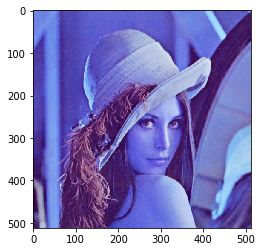

In [9]:
plt.imshow(img)

#### need to use `cvtColor` for converts to grayscale

In [51]:
img = cv.cvtColor(img, cv.IMREAD_GRAYSCALE) # or COLOR_BGR2RGB

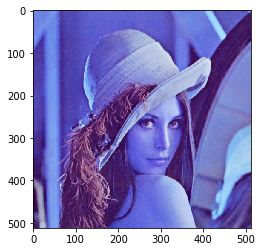

In [52]:
plt.imshow(img)

In [77]:
height = img.shape[0]
width = img.shape[1]

In [59]:
# Improve contrast
contrast_img = cv.equalizeHist(img)

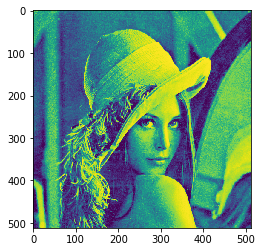

In [60]:
plt.imshow(contrast_img)

#### gaussian blur for canny

In [61]:
canny_img = cv.Canny(contrast_dst, 50, 300)

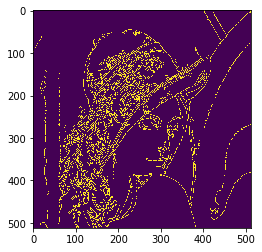

In [62]:
plt.imshow(canny_img)

#### Corners detection

In [69]:
corners = cv.goodFeaturesToTrack(copy.deepcopy(contrast_img), 200, 0.01, 10)
corners_img = copy.deepcopy(canny_img)
# draw circles in corners
for corner in corners:
    x, y = corner.ravel()
    cv.circle(corners_img, (x, y), 3, 255, -1)

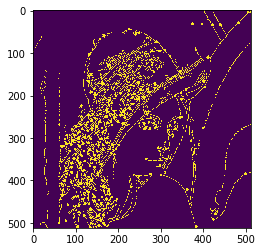

In [70]:
plt.imshow(corners_img)

#### Distance transform

In [71]:
corners_tmp = copy.deepcopy(corners_img)

corners_tmp = cv.threshold(corners_tmp, 100, 255, cv.THRESH_BINARY)[1]
cv.bitwise_not(corners_tmp, corners_tmp)  # make only edges picture


dist_transform = cv.distanceTransform(corners_tmp, cv.DIST_L2, 3)

# dist_transform = cv.normalize(dist_transform, dist_transform, 0, 1., cv.NORM_MINMAX)

norm_img = cv.normalize(copy.deepcopy(dist_transform),copy.deepcopy(dist_transform), 0, 1., cv.NORM_MINMAX)

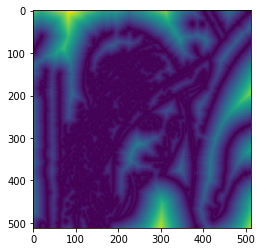

In [72]:
plt.imshow(norm_img)

#### Filter with integral image

In [85]:
def c_lamp(value, min, max):
    if value < min:
        return int(min)
    if value > max:
        return int(max)
    return int(value)

k = 0.8
integral_image = cv.integral(img)

filt_image = np.zeros((height, width), np.uint8)

for y in range(0, height):
    for x in range(0, width):
        radius = min(int(k * dist_transform[y, x]), 4)

        A = integral_image[c_lamp(y - radius, 0, height - 1), c_lamp(x - radius, 0, width - 1)]
        B = integral_image[c_lamp(y + 1 + radius, 0, height - 1), c_lamp(x - radius, 0, width - 1)]
        C = integral_image[c_lamp(y - radius, 0, height - 1), c_lamp(x + 1 + radius, 0, width - 1)]
        D = integral_image[c_lamp(y + 1 + radius, 0, height - 1), c_lamp(x + 1 + radius, 0, width - 1)]

        print(A," ",B," ",C," ",D," ")
        sum_ = A + D - C - B
        ave = (2 * radius + 1) ** 2
        print(sum_,"\n",ave,"\n\n")
        print("dsfds: ",filt_image[y, x])
        filt_image[y, x] = (sum_ / ave)

start_filtering
[0 0 0 0]   [0 0 0 0]   [0 0 0 0]   [3155 3425 5620 6375]  
[3155 3425 5620 6375] 
 81 


dsfds:  0


ValueError: setting an array element with a sequence.

In [ ]:
plt.imshow(filt_image)